### Exp 2a
TEST EIT (basic/dual) on data "daily9"

In [31]:
base_path="../eit_basic_dual_unreduced_experiments/exp_2a" #Don't add '/' at start and end
T=880 #Training time period
C=10000 #Capital available
file="daily9" #Index_file
m=8 #Inital Size of Kernel
lbuck=20 #Size Of Buckets
pho=0.1 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.2  # upper_bound
xii=0.2 # Limit for Tracking Error
k=50 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=10000
w_risk_down=1
x0_choice=2
#cj,cb are declared in script

In [19]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [20]:
from eit_basic_experiment import TestEitBasic
from eit_dual_exp import TestEitDual

### Basic

Running Linear Relaxation of EIT ...
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0009I 1 infeasibilities
Clp3003W Analysis indicates model infeasible or unbounded
Clp0014I Perturbing problem by 0.001% of 0.08004633 - largest nonzero change 0.00010317481 ( 263.05924%) - largest zero change 0.000103152
Clp0006I 1122  Obj 5.1132877 Primal inf 134.28856 (404) Dual inf 1.6396237e+13 (275)
Clp0006I 1542  Obj 5.1361547 Primal inf 91.889963 (330) Dual inf 8.1328611e+13 (307)
Clp0006I 1962  Obj 5.1965713 Primal inf 80.273961 (288) Dual inf 2.2998825e+14 (1101)
Clp0006I 2242  Obj 5.2118052 Primal inf 77.214257

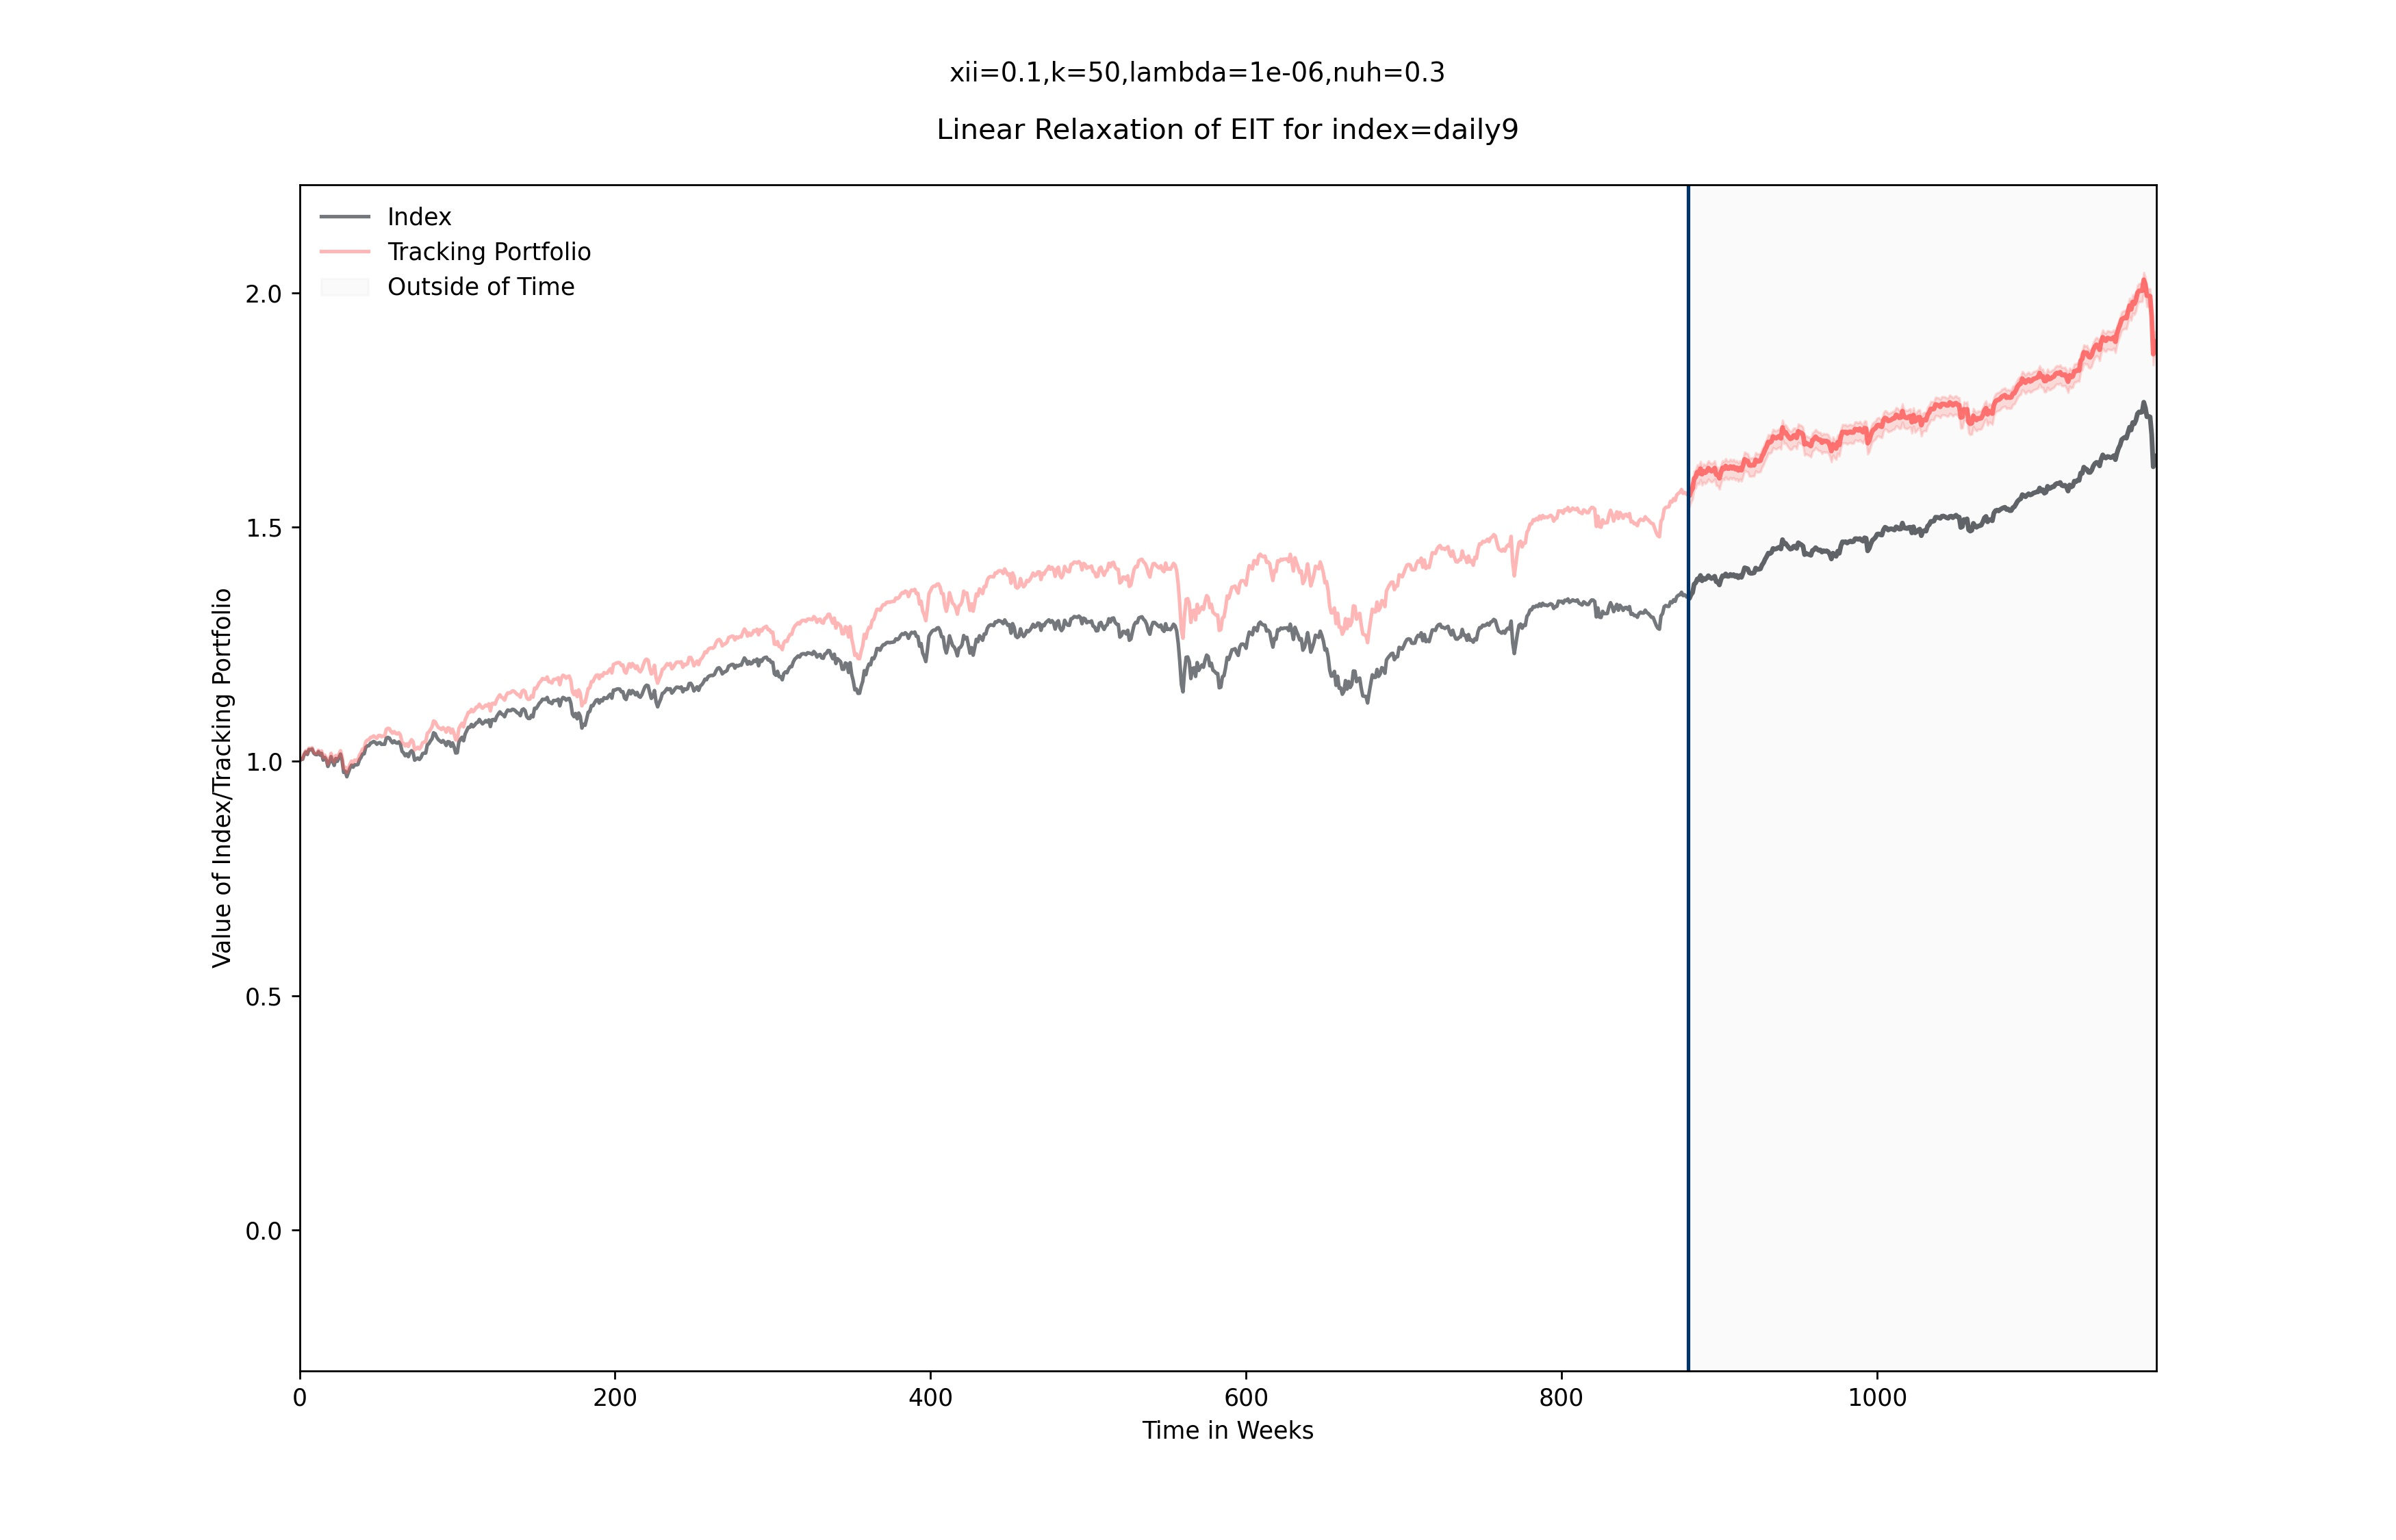

In [33]:
%%time
!python ../src/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f $base_path

Image(filename=base_path+'/LP_EIT for index_{}.jpg'.format(file))

### Dual

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 1857 (-1401) rows, 2744 (-1401) columns and 425406 (-4203) elements
Clp0014I Perturbing problem by 0.001% of 1.5843754e-05 - largest nonzero change 9.9801624e-05 ( 50697687%) - largest zero change 3.1651892e-05
Clp0006I 850  Obj -1.2421302 Primal inf 2418400.2 (1168)
Clp0006I 1471  Obj -2.4502722 Primal inf 209672.58 (790)
Clp0006I 2084  Obj -3.1265463 Primal inf 21217.657 (609)
Clp0006I 2807  Obj -3.4468376 Primal inf 101.10847 (86)
Clp0000I Optimal - objective value -3.4077568
Coin0511I After Postsolve, objective -3.4077568, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -3.407756823 - 2846 iterations ti

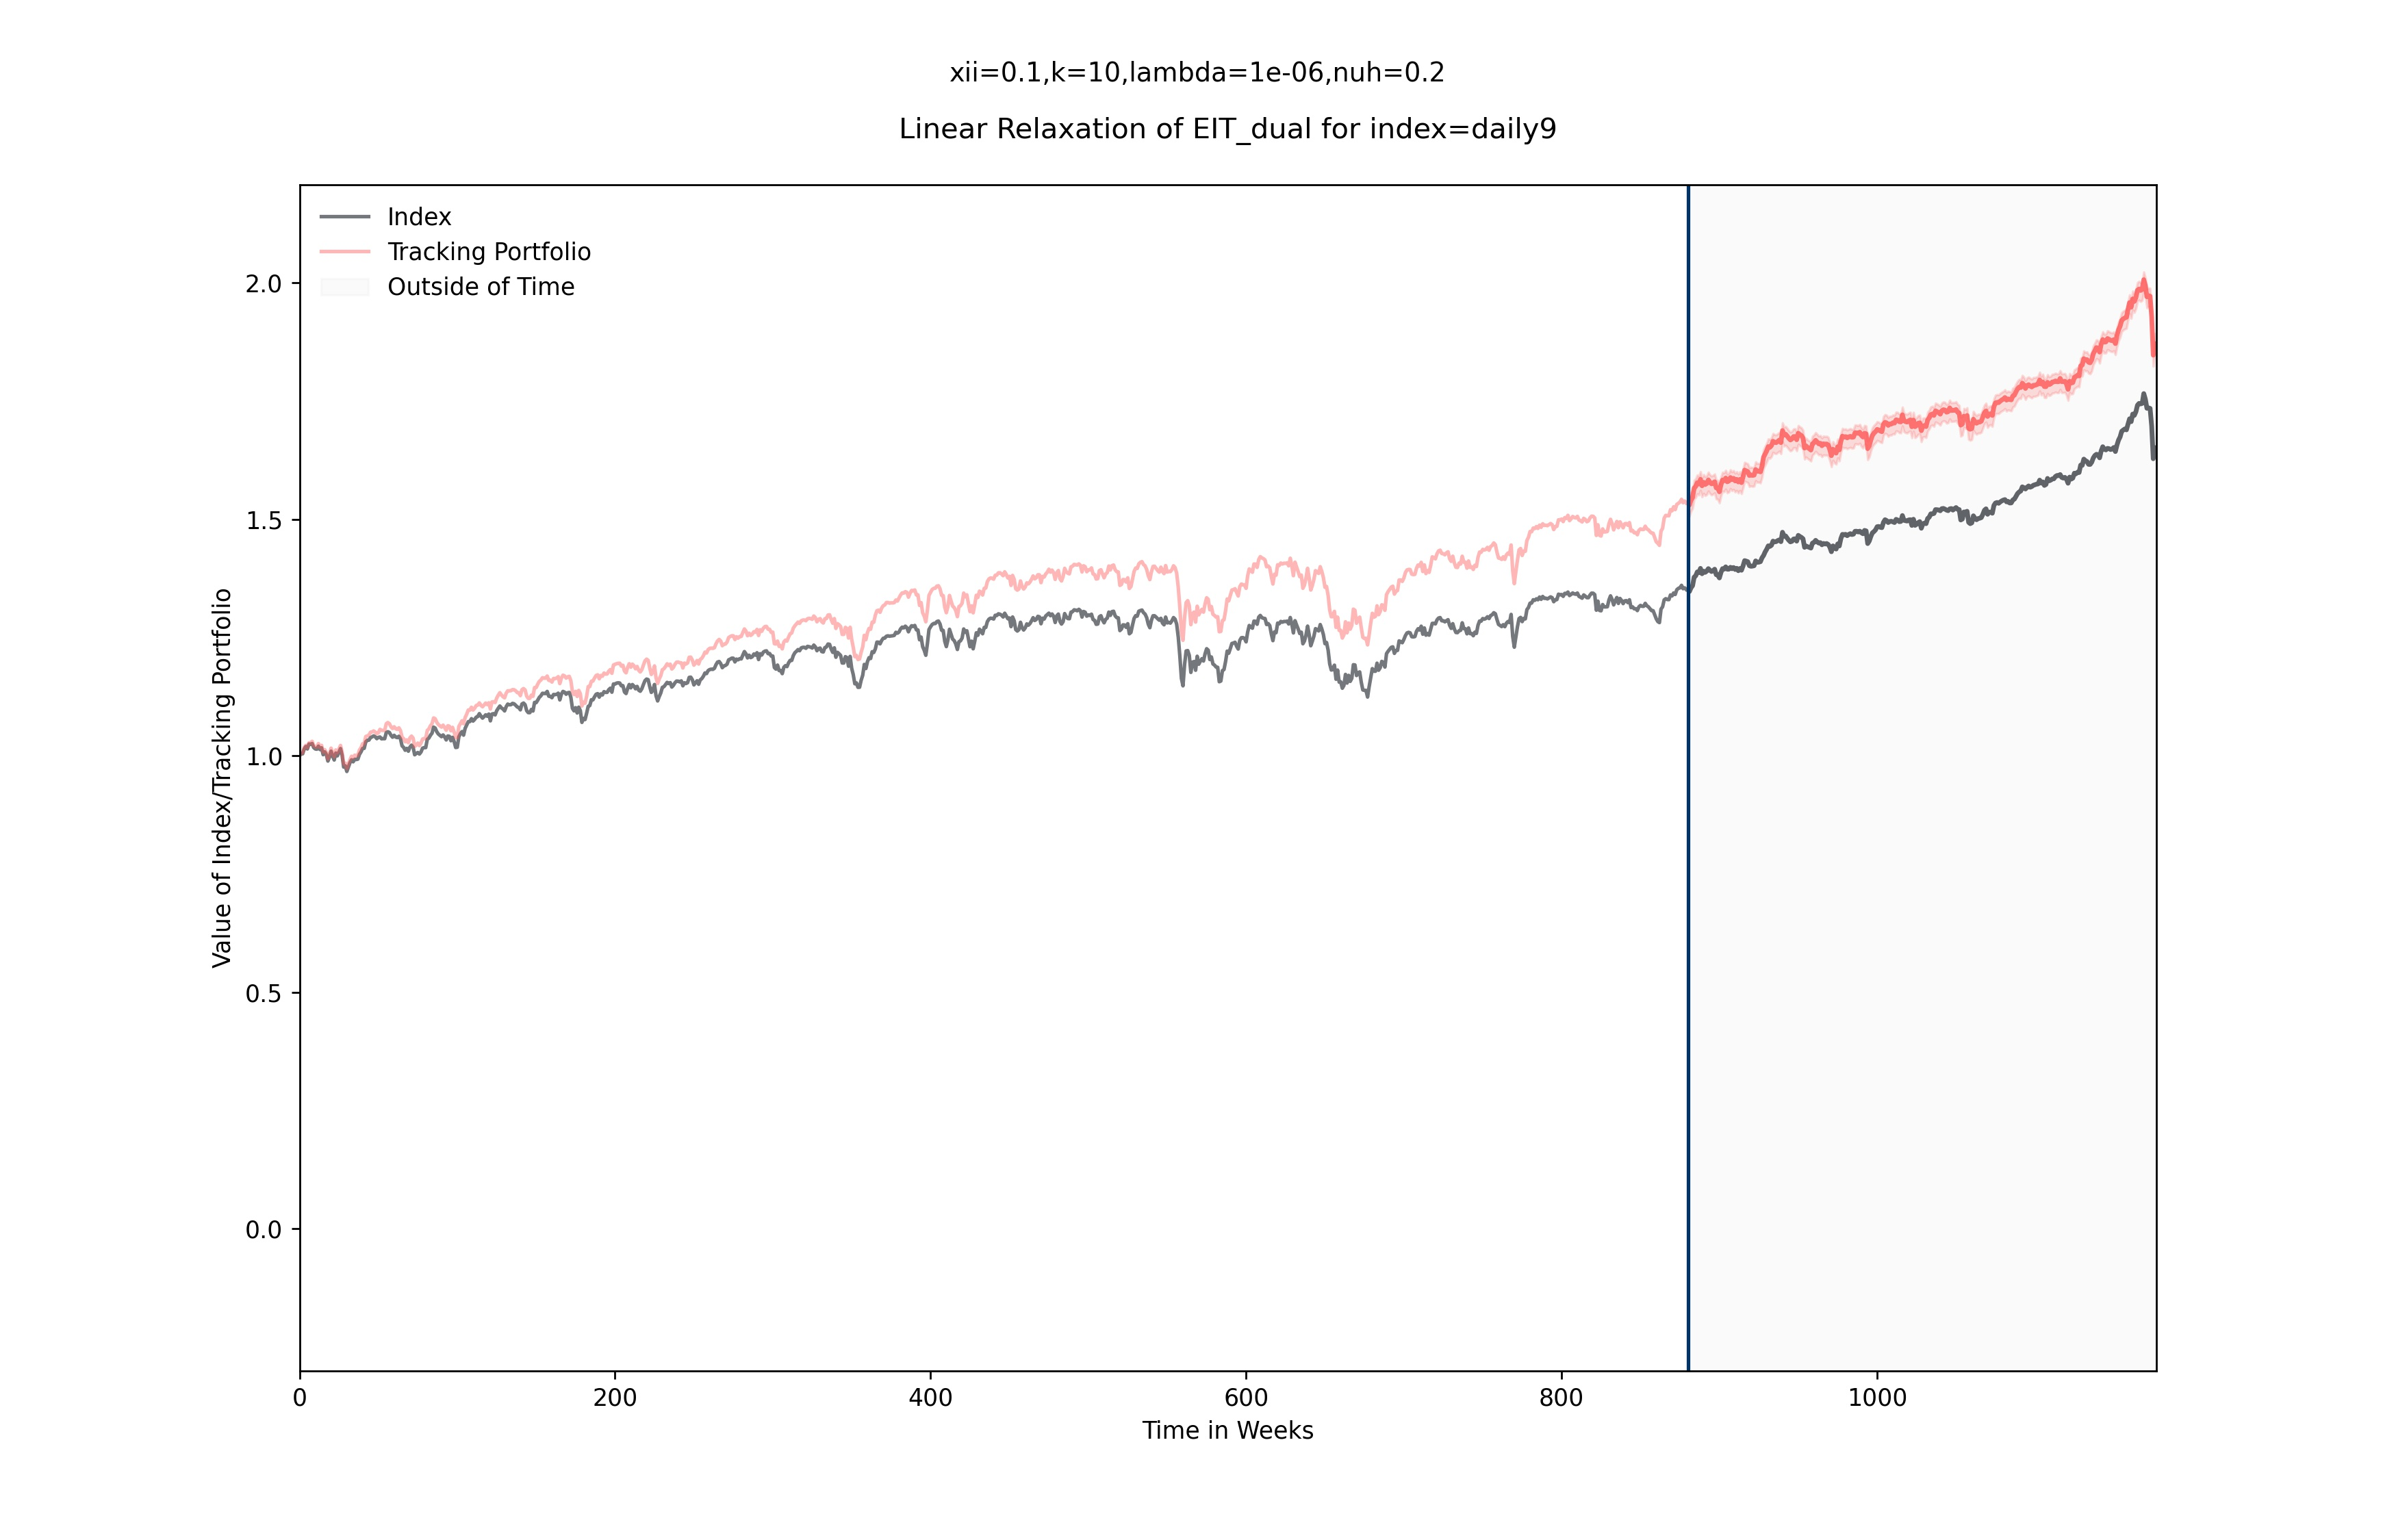

In [28]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))